Universidad Galileo  
Maestría en Data Science  
Statistical Learning II
Sección U  


   # **Proyecto: Parte 1 - MLP**


<p style="text-align: right;">
Henry Giovanni<br/>
Barrientos García<br/>
21001538<br/>
Guatemala, 24 de septiembre de 2021<br/>
</p>

# Primera parte - Multilayer Perceptron

In [1]:
import pandas as pd 
import numpy as np
import tensorflow as tf
import seaborn as sns
from tensorflow import keras
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split

C:\Users\hbarrientosg\Anaconda3\envs\TareasSLII\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\hbarrientosg\Anaconda3\envs\TareasSLII\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\hbarrientosg\Anaconda3\envs\TareasSLII\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\hbarrientosg\Anaconda3\envs\

## Carga y análisis de datos

In [2]:
data = pd.read_csv('BankChurners.csv')

In [3]:
cols_remove = ["CLIENTNUM", 
               "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1", 
               "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"]
data = data.drop(cols_remove, axis = 1)
data.shape

(10127, 20)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [5]:
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [6]:
data.tail()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000
10126,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


## Análisis estadístico de los datos

In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.0,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
Dependent_count,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
Months_on_book,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.0,3.812580,1.554408,1.0,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.0,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.0,2.455317,1.106225,0.0,2.000,2.000,3.000,6.000
Credit_Limit,10127.0,8631.953698,9088.776650,1438.3,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.0,1162.814061,814.987335,0.0,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.0,7469.139637,9090.685324,3.0,1324.500,3474.000,9859.000,34516.000
Total_Amt_Chng_Q4_Q1,10127.0,0.759941,0.219207,0.0,0.631,0.736,0.859,3.397


In [8]:
data.describe(include="object").T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,10127,7,Graduate,3128
Marital_Status,10127,4,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


In [9]:
cat_features = data.select_dtypes(['object', 'category']).columns.to_list()
for cat in cat_features:
    print(cat)
    print("-" * len(cat))
    df_values = pd.concat(
                        [data[cat].value_counts(), data[cat].value_counts(normalize=True) * 100],
                        axis=1)
    df_values.columns = ["Cantidad", "Porcentaje"]
    print(df_values, "\n")

Attrition_Flag
--------------
                   Cantidad  Porcentaje
Existing Customer      8500   83.934038
Attrited Customer      1627   16.065962 

Gender
------
   Cantidad  Porcentaje
F      5358   52.908068
M      4769   47.091932 

Education_Level
---------------
               Cantidad  Porcentaje
Graduate           3128   30.887726
High School        2013   19.877555
Unknown            1519   14.999506
Uneducated         1487   14.683519
College            1013   10.002962
Post-Graduate       516    5.095290
Doctorate           451    4.453441 

Marital_Status
--------------
          Cantidad  Porcentaje
Married       4687   46.282216
Single        3943   38.935519
Unknown        749    7.396070
Divorced       748    7.386195 

Income_Category
---------------
                Cantidad  Porcentaje
Less than $40K      3561   35.163425
$40K - $60K         1790   17.675521
$80K - $120K        1535   15.157500
$60K - $80K         1402   13.844179
Unknown             1112   10.9805

## Conversión de datos categóricos

In [10]:
data_cat = data[cat_features]
data_cat

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue
3,Existing Customer,F,High School,Unknown,Less than $40K,Blue
4,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue
...,...,...,...,...,...,...
10122,Existing Customer,M,Graduate,Single,$40K - $60K,Blue
10123,Attrited Customer,M,Unknown,Divorced,$40K - $60K,Blue
10124,Attrited Customer,F,High School,Married,Less than $40K,Blue
10125,Attrited Customer,M,Graduate,Unknown,$40K - $60K,Blue


In [11]:
data['Attrition_Flag'] = data['Attrition_Flag'].map({'Attrited Customer':1, 'Existing Customer':0})
data['Gender'] = data['Gender'].map({'M':0, 'F':1})

for cat in cat_features:
    if (cat not in ['Attrition_Flag', 'Gender']):
        ordinal_encoder = OrdinalEncoder(categories=[list(data[cat].value_counts().index)])
        data[cat] = ordinal_encoder.fit_transform(data_cat[[cat]])
# data[cat].value_counts().index
# data[cat].value_counts()

In [12]:
data[cat_features].head()

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,0,0,1.0,0.0,3.0,0.0
1,0,1,0.0,1.0,0.0,0.0
2,0,0,0.0,0.0,2.0,0.0
3,0,1,1.0,2.0,0.0,0.0
4,0,0,3.0,0.0,3.0,0.0


## Conversión escalar de datos numéricos

In [13]:
cont = data.select_dtypes(['float64','int64','category']).columns.to_list()
data_cont = data[cont]
data_cont.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,0,3,1.0,0.0,3.0,0.0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,1,5,0.0,1.0,0.0,0.0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,0,3,0.0,0.0,2.0,0.0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,1,4,1.0,2.0,0.0,0.0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,0,3,3.0,0.0,3.0,0.0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [14]:
# Se escalan solo aquellos que tiene una media mayor a 1000
df_describe = data.describe().transpose()
col_names = df_describe[df_describe["mean"] > 1000].index
for col_name in col_names:
    standard_scaler = StandardScaler()
    data[col_name] = standard_scaler.fit_transform(data_cont[[col_name]])

In [15]:
# plt.figure(figsize=(15,10))
# sns.heatmap(data.corr(), cmap="YlGnBu", annot=True, linewidths=.5)
# sns.set(font_scale=1,style='white')

## Creación de datos de entrenamiento y prueba

In [16]:
data_rnd = data.sample(frac=1)
X = data_rnd.iloc[:, 1:]
Y = data_rnd.iloc[:, 0]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

## Creación y entrenamiento de modelo

### Modelo de prueba 1
A continuación se implementa un modelo muy sencillo con una capa de entrada y una de salida, con esto vemos que el ajuste es muy bajo.

In [17]:
model = keras.models.Sequential([
    keras.layers.Dense(len(X.columns), input_shape=x_train.shape[1:]),
    keras.layers.Dense(1, activation="relu",  kernel_initializer="he_normal")
])
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.Nadam(learning_rate=0.001), 
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=50, verbose = 0)

model.evaluate(x_test, y_test, batch_size = 50, verbose = 1)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
2532/2532 [==============================] - 0s 50us/sample - loss: 2.5160 - acc: 0.8369


[2.515996655817092, 0.83688784]

### Modelo de prueba 2
A continuación se implementa un modelo sencillo con una capa de entrada, dos capas oculta y una de salida, con esto vemos que el ajuste aun se mantiene bajo. Este es un segundo modelo de experimentación.

In [18]:
model = keras.models.Sequential([
    keras.layers.Dense(len(X.columns), input_shape=x_train.shape[1:]),
    keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal"),
    keras.layers.Dense(7, activation="relu", kernel_initializer="he_normal"),
    keras.layers.Dense(1, activation="sigmoid")
])
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.Nadam(learning_rate=0.001), 
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=50, verbose = 0)

model.evaluate(x_test, y_test, batch_size=50, verbose=1)

2532/2532 [==============================] - 0s 68us/sample - loss: 0.1865 - acc: 0.9281


[0.18648379589144087, 0.9281201]

### Modelo de prueba 3 (definitivo)
Luego de varios experimentos con distintas funciones de costo y activación, llegamos a nuestro modelo definitivo con las configuraciones que se ven más abajo. Nuestro modelo implementa la función de ***batch normalization***, una segunda capa intermedia, la regurlarización con ***dropout*** y en la capa de salida la activación con sigmoid. Los resultados en la mejor son evidentes pues con esta configuración se alcanza una mejor aproximación.

In [19]:
model = keras.models.Sequential([
    keras.layers.Dense(len(X.columns), input_shape=x_train.shape[1:]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(19, activation="relu"),
    keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal"),
    keras.layers.Dense(7, activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation="sigmoid")
])
model.compile(loss="binary_crossentropy",
              optimizer="adam",
#               optimizer="nadam",
              metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=125, verbose = 0)

model.evaluate(x_test, y_test, batch_size=50, verbose=1)

2532/2532 [==============================] - 0s 94us/sample - loss: 0.1217 - acc: 0.9562


[0.12174706301971164, 0.95616114]

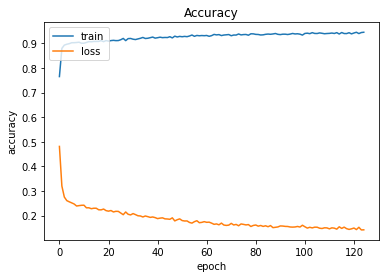

In [29]:
history.history.keys()
plt.plot(history.history['acc'])
plt.plot(history.history['loss'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', "loss"], loc='upper left')
plt.show()